Filtered Emails (first few rows):

╭────────────┬────────────┬────────────┬────────────┬─────────────────────────────────────────────────────────────╮
│ Message-ID │ From       │ To         │ Date       │ Content                                                     │
├────────────┼────────────┼────────────┼────────────┼─────────────────────────────────────────────────────────────┤
│ <6336501.… │ ('sarah.p… │ ('sarah.p… │ 2002-02-01 │ joint venture enron meeting belies officers claims th e     │
│            │            │            │ 14:53:35   │ dark minutes show hearing novel partnerships...             │
╰────────────┴────────────┴────────────┴────────────┴─────────────────────────────────────────────────────────────╯

Flagged Emails Count:

┏━━━━━━┳━━━━━━━┓
┃ Flag ┃ Count ┃
┡━━━━━━╇━━━━━━━┩
│ 0    │  2089 │
│ 1    │     1 │
└──────┴───────┘

Unique Senders in Filtered Emails (1):

- ('sarah.palmer@enron.com')

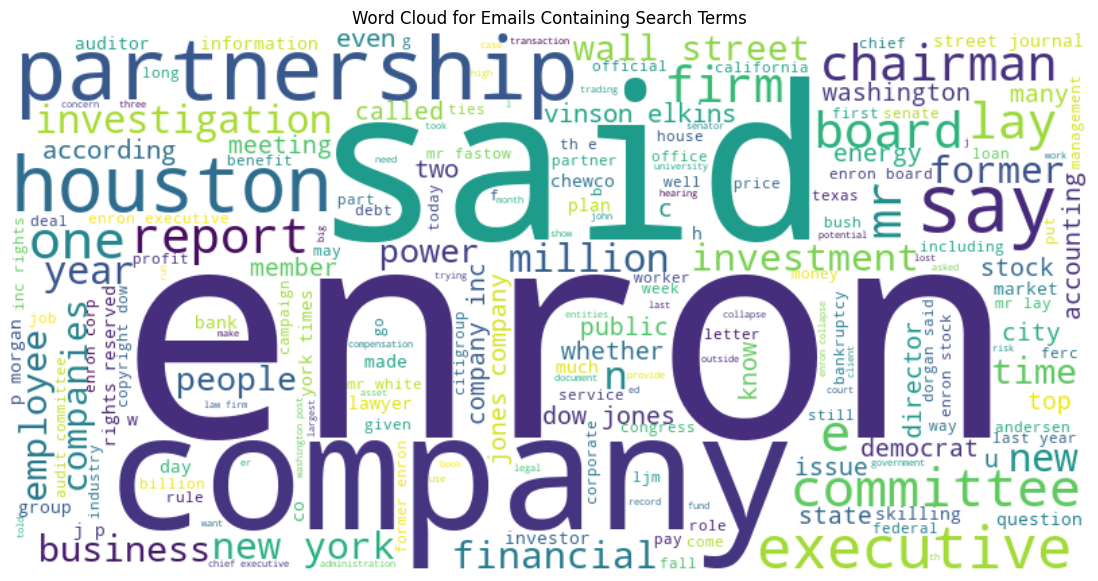

In [20]:
# Import necessary libraries
import pandas as pd
import os
from rich.console import Console
from rich.table import Table
from rich import box
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set up the console for rich printing
console = Console()

# Define file path
csv_file_path = os.path.join(os.getcwd(), '01-data/FD_01_enron.csv')

# Read CSV file into DataFrame
df = pd.read_csv(csv_file_path)

# Define search terms
search_terms = ['sell enron stock']

# Use vectorized string operations to filter rows
filtered_emails = df[df['clean_content'].str.contains('|'.join(search_terms), na=False)]

# Create a rich table for filtered emails
email_table = Table(show_header=True, header_style="bold magenta", box=box.ROUNDED)
email_table.add_column("Message-ID", style="dim", width=30)
email_table.add_column("From", width=30)
email_table.add_column("To", width=30)
email_table.add_column("Date", style="dim", width=30)
email_table.add_column("Content", overflow="fold", width=80)  
for _, row in filtered_emails.head().iterrows():
    email_table.add_row(
        str(row['Message-ID']),
        row['From'],
        row['To'],
        str(row['Date']),
        row['clean_content'][:100] + "..."  # Show beginning of content
    )

console.print("Filtered Emails (first few rows):", style="bold underline")
console.print(email_table)

df['flag'] = df['clean_content'].str.contains('|'.join(search_terms), na=False).astype(int)

# Now, let's continue with the display and word cloud generation as intended
console.print("Flagged Emails Count:", style="bold underline")
flag_table = Table(show_header=True, header_style="bold magenta")
flag_table.add_column("Flag", style="dim")
flag_table.add_column("Count", justify="right")
flag_counts = df['flag'].value_counts().items()
for flag, count in flag_counts:
    flag_table.add_row(str(flag), str(count))
console.print(flag_table)

# Function to print unique senders from filtered emails using rich
def print_unique_senders(emails_df):
    unique_senders = emails_df['From'].dropna().unique()
    console.print(f"Unique Senders in Filtered Emails ({len(unique_senders)}):", style="bold underline")
    for sender in unique_senders:
        console.print(f"- {sender}")

# Print unique senders from emails that match the search terms
print_unique_senders(filtered_emails)

# Combine the content of the filtered emails into one large text string for the word cloud
text_for_wordcloud = " ".join(email for email in filtered_emails['clean_content'].dropna())

# Generate a word cloud from the combined text of filtered emails
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(15, 7))  # Size of the figure
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud for Emails Containing Search Terms')
plt.show()
